In [3]:
import pandas as pd

# Load the BOM dataset
bom = pd.read_csv('..\\data\\processed\\bom_clean.csv')

# Display the first few rows of the BOM dataset
bom.head(10)

,title,studio,domestic_gross,foreign_gross,year,title_clean
0,Toy Story 3,BV,415000000.0,652000000,2010,toy story 3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,alice in wonderland (2010)
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,harry potter and the deathly hallows part 1
3,Inception,WB,292600000.0,535700000,2010,inception
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,shrek forever after
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,the twilight saga: eclipse
6,Iron Man 2,Par.,312400000.0,311500000,2010,iron man 2
7,Tangled,BV,200800000.0,391000000,2010,tangled
8,Despicable Me,Uni.,251500000.0,291600000,2010,despicable me
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,how to train your dragon


## 1. Revenue Analysis; Domestis and Foreign Gross

### 1.1 Finding the totals of domestic and foreign gross 

In [6]:
# Convert gross columns to numeric, coercing errors to NaN
bom['domestic_gross'] = pd.to_numeric(bom['domestic_gross'], errors='coerce')
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

# Calculate totals
total_domestic = bom['domestic_gross'].sum()
total_foreign = bom['foreign_gross'].sum()

# Convert to millions for readability
total_domestic_million = round(total_domestic / 1_000_000, 2)
total_foreign_million = round(total_foreign / 1_000_000, 2)

# Print results
print(f"Total Domestic Gross: ${total_domestic_million} million")
print(f"Total Foreign Gross: ${total_foreign_million} million")


Total Domestic Gross: $96557.29 million
Total Foreign Gross: $152515.91 million


### 2.1 Calculating domestic_gross and foreign_gross mean

This will help us compare between the two has the highest gross amounts.

In [22]:
# Calculate mean for domestic and foreign gross

bom['domestic_gross'] = pd.to_numeric(bom['domestic_gross'], errors='coerce')
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

mean_domestic = bom['domestic_gross'].mean()
mean_foreign = bom['foreign_gross'].mean()

# Calculate the meaan difference between domestic and foreign gross
mean_difference = mean_foreign - mean_domestic

print(f"Mean Domestic Gross: ${mean_domestic:,.0f}")
print(f"Mean Foreign Gross: ${mean_foreign:,.0f}")
print(f"Mean Difference (Foreign - Domestic): ${mean_difference:,.0f}")


Mean Domestic Gross: $28,745,845
Mean Foreign Gross: $75,057,042
Mean Difference (Foreign - Domestic): $46,311,197


Based on the mean, the films in the BOM dataset generate **$46,311,197** more revenue internationally than domestically.

### 3.1 Figuring out revenue trends over the years

In [34]:
# Group revenue by year
yearly_revenue = bom.groupby('year')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Convert to millions and round for readability
yearly_revenue['domestic_gross'] = (yearly_revenue['domestic_gross'] / 1_000_000).round(2)
yearly_revenue['foreign_gross'] = (yearly_revenue['foreign_gross'] / 1_000_000).round(2)
yearly_revenue


,year,domestic_gross,foreign_gross
0,2010,31.45,45.78
1,2011,25.35,53.48
2,2012,27.68,68.15
3,2013,31.28,81.04
4,2014,26.44,71.31
5,2015,24.61,80.87
6,2016,25.99,98.05
7,2017,34.17,113.28
8,2018,36.01,101.60


## 2.Studio Performance Analysis

We aim to identify which studio generates the highest total revenue separately for domestic and foreign markets.

This analysis helps us understand:

-Which studios are dominating domestic markets.

-Which studios are performing best in international markets.

-The comparison between domestic and foreign earnings by studio.

### 2.1 Studio with Highest Domestic Gross

In [29]:
# Studio with Highest Domestic Gross

bom['domestic_gross'] = pd.to_numeric(bom['domestic_gross'], errors='coerce')

# Group by studio: sum gross and count movies
studio_domestic_stats = bom.groupby('studio').agg(
    total_domestic=('domestic_gross', 'sum'),
    num_movies=('domestic_gross', 'count')
)

# Find studio with highest domestic gross
top_domestic_studio = studio_domestic_stats['total_domestic'].idxmax()
top_domestic_amount = studio_domestic_stats['total_domestic'].max()
top_domestic_movies = studio_domestic_stats.loc[top_domestic_studio, 'num_movies']

print(f"Studio with Highest Domestic Gross: {top_domestic_studio}")
print(f"Total Domestic Gross: ${top_domestic_amount:,.0f}")
print(f"Number of Movies: {top_domestic_movies}\n")



Studio with Highest Domestic Gross: BV
Total Domestic Gross: $18,419,029,199
Number of Movies: 106



### 2.2 Studio with Highest Foreign Gross

In [30]:
# Studio with Highest Foreign Gross

bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

# Group by studio: sum gross and count movies
studio_foreign_stats = bom.groupby('studio').agg(
    total_foreign=('foreign_gross', 'sum'),
    num_movies=('foreign_gross', 'count')
)

# Find studio with highest foreign gross
top_foreign_studio = studio_foreign_stats['total_foreign'].idxmax()
top_foreign_amount = studio_foreign_stats['total_foreign'].max()
top_foreign_movies = studio_foreign_stats.loc[top_foreign_studio, 'num_movies']

print(f"Studio with Highest Foreign Gross: {top_foreign_studio}")
print(f"Total Foreign Gross: ${top_foreign_amount:,.0f}")
print(f"Number of Movies: {top_foreign_movies}")


Studio with Highest Foreign Gross: BV
Total Foreign Gross: $25,793,852,199
Number of Movies: 102


### 2.3  Top Studios by Domestic and Foreign Gross Each Year

In [11]:
# Calculate total gross for each movie
bom['domestic_gross'] = pd.to_numeric(bom['domestic_gross'], errors='coerce')
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

# Group by year and studio, summing gross
studio_year_revenue = bom.groupby(['year', 'studio'])[['domestic_gross', 'foreign_gross']].sum().reset_index()

# Convert to millions and round for readability
studio_year_revenue['domestic_gross'] = (studio_year_revenue['domestic_gross'] / 1_000_000).round(2)
studio_year_revenue['foreign_gross'] = (studio_year_revenue['foreign_gross'] / 1_000_000).round(2)

# Find studio with highest domestic gross per year
top_domestic_studios = studio_year_revenue.loc[studio_year_revenue.groupby('year')['domestic_gross'].idxmax()]

# Find studio with highest foreign gross per year
top_foreign_studios = studio_year_revenue.loc[studio_year_revenue.groupby('year')['foreign_gross'].idxmax()]

# Preview results
print("Top Domestic Studios by Year:")
print(top_domestic_studios)

print("\nTop Foreign Studios by Year:")
print(top_foreign_studios)

Top Domestic Studios by Year:
     year studio  domestic_gross  foreign_gross
6    2010     BV         1519.13        2652.04
150  2011     WB         1575.20        2275.23
163  2012     BV         1575.90        2026.20
242  2013     BV         1816.40        3233.20
347  2014    Fox         1814.40        3627.00
412  2015     BV         2495.70        2550.11
499  2016     BV         2871.00        4393.30
594  2017     BV         2378.20        3946.60
671  2018     BV         3045.60        2621.80

Top Foreign Studios by Year:
     year studio  domestic_gross  foreign_gross
6    2010     BV         1519.13        2652.04
150  2011     WB         1575.20        2275.23
221  2012   Sony         1435.60        2477.90
242  2013     BV         1816.40        3233.20
347  2014    Fox         1814.40        3627.00
412  2015     BV         2495.70        2550.11
499  2016     BV         2871.00        4393.30
594  2017     BV         2378.20        3946.60
738  2018     WB         172

### 2.3 Total Movies Produced by Each Studio

In [10]:
# Count total number of movies per studio
total_movies_per_studio = bom.groupby('studio')['title_clean'].count().reset_index()

# Rename column for clarity
total_movies_per_studio.rename(columns={'title_clean': 'total_movies'}, inplace=True)

# Preview results
total_movies_per_studio.sort_values(by='total_movies', ascending=False)

,studio,total_movies
113,IFC,166
238,Uni.,147
246,WB,140
148,Magn.,136
93,Fox,136
...,...,...
20,App.,1
22,Argo.,1
255,Zee,1
250,WOW,1


## 3.  Findings Summary

1. Foreign revenue dominates: Average foreign gross per movie is consistently higher than domestic.

2. Domestic revenue is stable: Averages hover around $25–36M, showing limited growth.

3. Foreign revenue grows over time: From $45.78M in 2010 to $101.6M in 2018.

4. Gap widens: Later years show foreign earnings ≈ 3× domestic, highlighting global market potential.

5. BV Studio is the most consistent performer in both domestic and foreign markets

6. IFC Studio has produced the highest number of movies overall, with a total of 166 films.


# 4. Data Visualizations

## 4.1 Bar Chart: Total Domestic vs. Total Foreign Gross

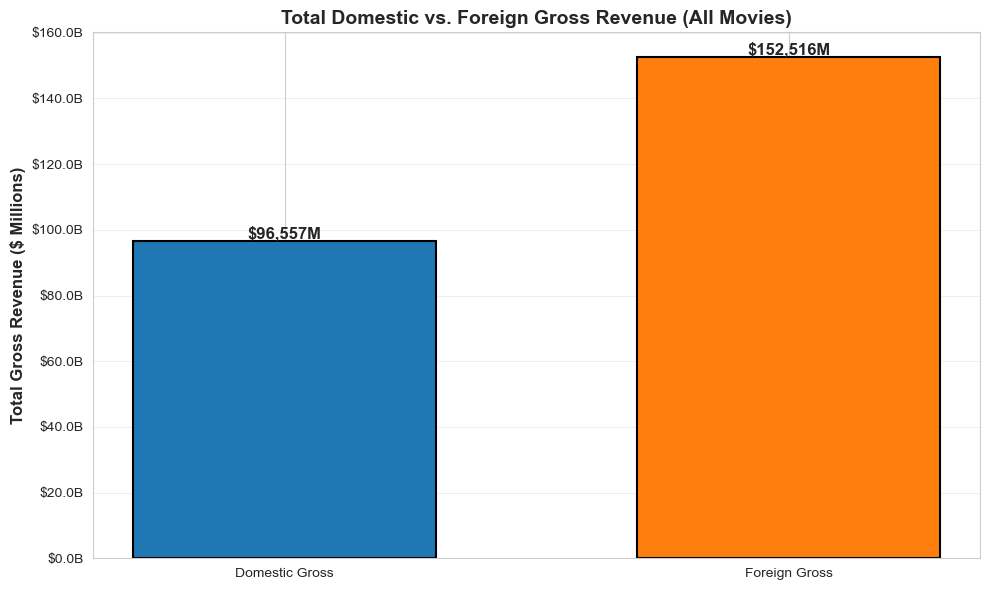

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create bar chart comparing total domestic vs foreign gross
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Domestic Gross', 'Foreign Gross']
totals = [total_domestic_million, total_foreign_million]
colors = ['#1f77b4', '#ff7f0e']

bars = ax.bar(categories, totals, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar, total in zip(bars, totals):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${total:,.0f}M',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
ax.set_ylabel('Total Gross Revenue ($ Millions)', fontsize=12, fontweight='bold')
ax.set_title('Total Domestic vs. Foreign Gross Revenue (All Movies)', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.1f}B'))

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

Key insights from the visualization:

Domestic Gross: $96.6 billion (blue bar)
Foreign Gross: $152.5 billion (orange bar)
Foreign dominates with approximately 1.6x more revenue than domestic markets

## 4.2 Line Chart: Domestic vs. Foreign Revenue Over Time

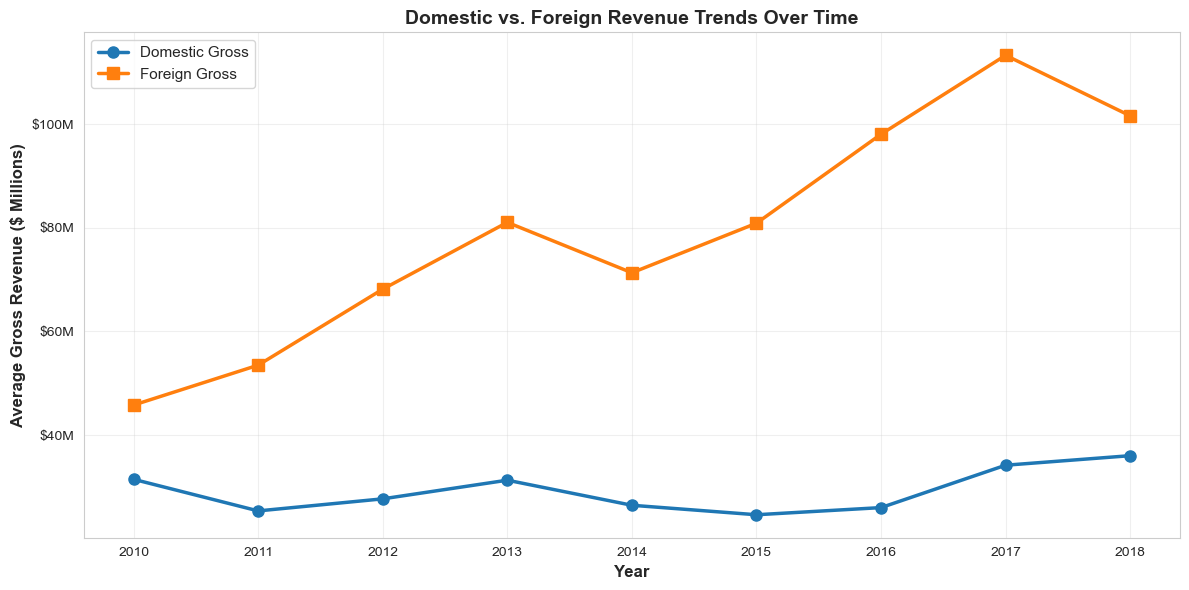

In [18]:
# Create yearly_revenue if not already defined
if 'yearly_revenue' not in locals():
    yearly_revenue = bom.groupby('year')[['domestic_gross', 'foreign_gross']].mean().reset_index()
    yearly_revenue['domestic_gross'] = (yearly_revenue['domestic_gross'] / 1_000_000).round(2)
    yearly_revenue['foreign_gross'] = (yearly_revenue['foreign_gross'] / 1_000_000).round(2)

# Create line chart for domestic vs foreign revenue trends
fig, ax = plt.subplots(figsize=(12, 6))

# Plot domestic and foreign revenue trends
ax.plot(yearly_revenue['year'], yearly_revenue['domestic_gross'], 
        marker='o', linewidth=2.5, label='Domestic Gross', color='#1f77b4', markersize=8)
ax.plot(yearly_revenue['year'], yearly_revenue['foreign_gross'], 
        marker='s', linewidth=2.5, label='Foreign Gross', color='#ff7f0e', markersize=8)

# Customize the plot
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Gross Revenue ($ Millions)', fontsize=12, fontweight='bold')
ax.set_title('Domestic vs. Foreign Revenue Trends Over Time', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}M'))

plt.tight_layout()
plt.show()

Key insights from the chart:

Domestic revenue (blue line) remains relatively stable at $25-36M throughout the period
Foreign revenue (orange line) shows significant growth, rising from ~$46M in 2010 to peak at ~$107M in 2017
Widening gap: The gap between foreign and domestic revenue increases dramatically over time, with foreign eventually reaching 3x the domestic revenue
Growth pattern: Foreign revenue demonstrates consistent upward momentum, particularly accelerating from 2015 onwards

## 4.3 Grouped Bar Chart: Top Studios - Domestic vs. Foreign Comparison

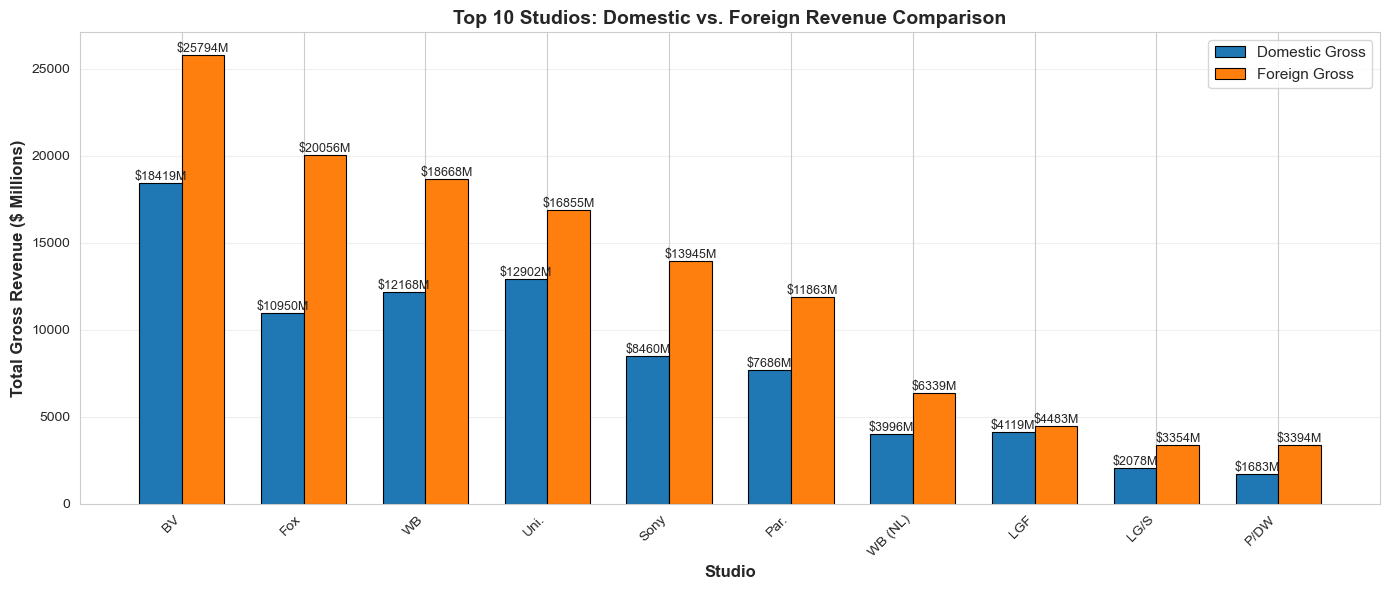

Top 10 Studios - Revenue Breakdown:
 studio  domestic_gross  foreign_gross  total_gross
     BV        18419.03       25793.85     44212.88
    Fox        10949.50       20055.87     31005.37
     WB        12168.05       18667.90     30835.95
   Uni.        12902.39       16854.77     29757.16
   Sony         8459.68       13945.35     22405.03
   Par.         7685.87       11863.38     19549.25
WB (NL)         3995.70        6339.00     10334.70
    LGF         4118.96        4482.62      8601.58
   LG/S         2078.20        3353.72      5431.92
   P/DW         1682.90        3393.60      5076.50


In [20]:
# Get top studios by total revenue (domestic + foreign)
studio_revenue = bom.groupby('studio').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

# Convert to millions
studio_revenue['domestic_gross'] = (studio_revenue['domestic_gross'] / 1_000_000).round(2)
studio_revenue['foreign_gross'] = (studio_revenue['foreign_gross'] / 1_000_000).round(2)
studio_revenue['total_gross'] = studio_revenue['domestic_gross'] + studio_revenue['foreign_gross']

# Get top 10 studios by total revenue
top_10_studios = studio_revenue.nlargest(10, 'total_gross')

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 6))

x = range(len(top_10_studios))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], top_10_studios['domestic_gross'], 
               width, label='Domestic Gross', color='#1f77b4', edgecolor='black', linewidth=0.8)
bars2 = ax.bar([i + width/2 for i in x], top_10_studios['foreign_gross'], 
               width, label='Foreign Gross', color='#ff7f0e', edgecolor='black', linewidth=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.0f}M',
                ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_xlabel('Studio', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Gross Revenue ($ Millions)', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Studios: Domestic vs. Foreign Revenue Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_10_studios['studio'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Display the data
print("Top 10 Studios - Revenue Breakdown:")
print(top_10_studios[['studio', 'domestic_gross', 'foreign_gross', 'total_gross']].to_string(index=False))